<a href="https://colab.research.google.com/github/varshctrl/CustomerSegmentationEngine/blob/main/CustomerSegmentationEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER SEGMENTATION ENGINE USING K MEANS CLUSTERING ALGORITHM**

---

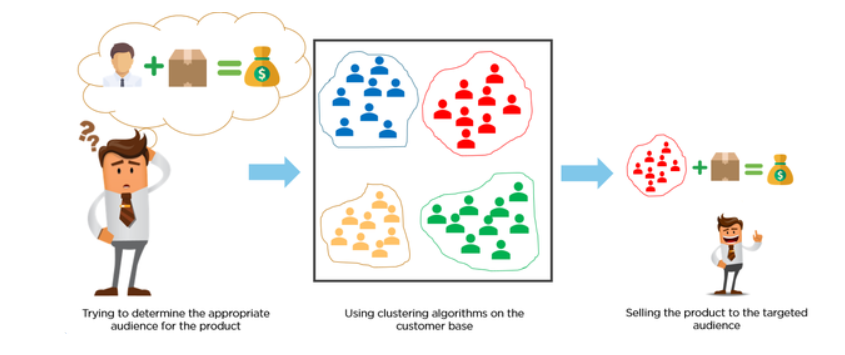

# **Installing the Libraries**


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [22]:
!pip install dabl
import dabl

# **Importing the Dataset**




In [23]:
data= pd.read_csv('Mall_Customers.csv')

# **Examining Data**

In [24]:
print("Shape of the dataset :", data.shape)

Shape of the dataset : (200, 5)


In [25]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [27]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
66,67,Female,43,48,50
171,172,Male,28,87,75
135,136,Female,29,73,88
153,154,Female,38,78,76
197,198,Male,32,126,74


# **Data Visualization**

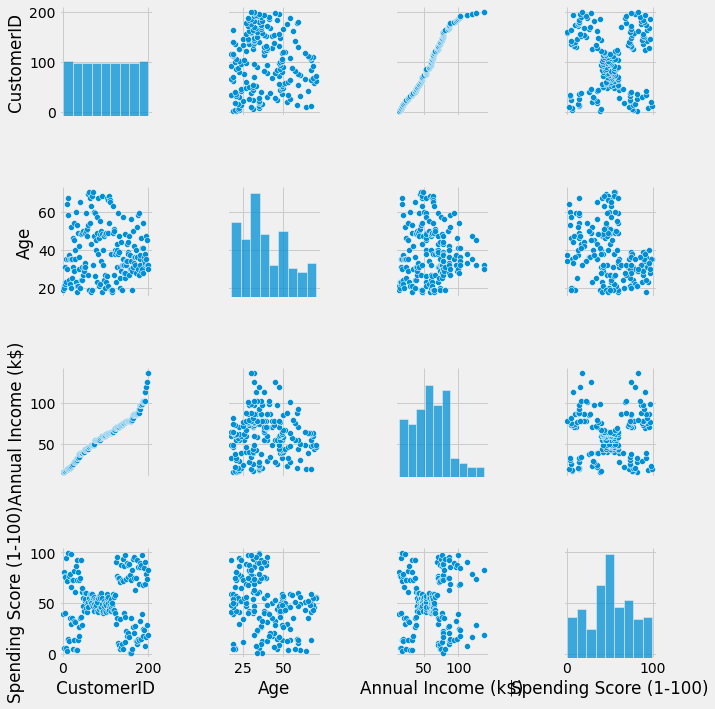

In [28]:
sns.pairplot(data)
plt.show()

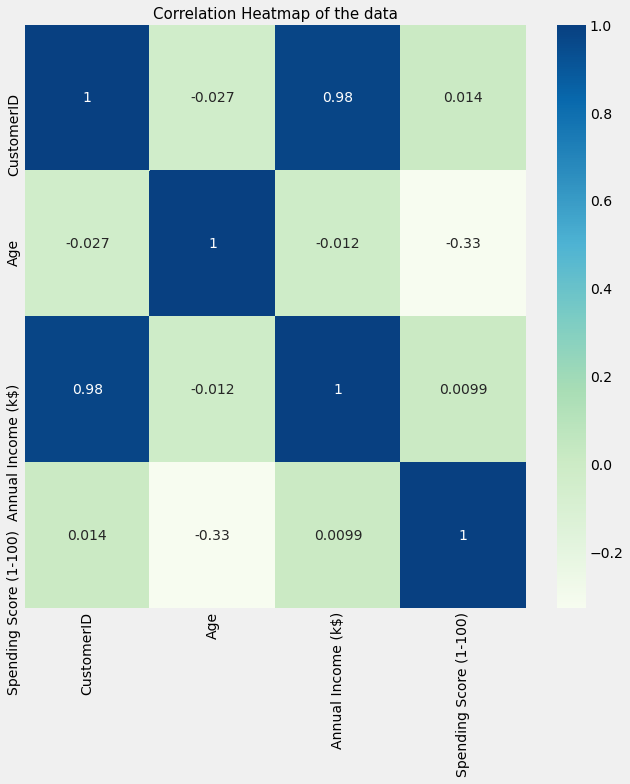

In [29]:
sns.heatmap(data.corr(), annot= True, cmap = 'GnBu')
plt.title('Correlation Heatmap of the data', fontsize = 15)
plt.show()

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc53ed19550>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc52b422090>]],
       dtype=object)]

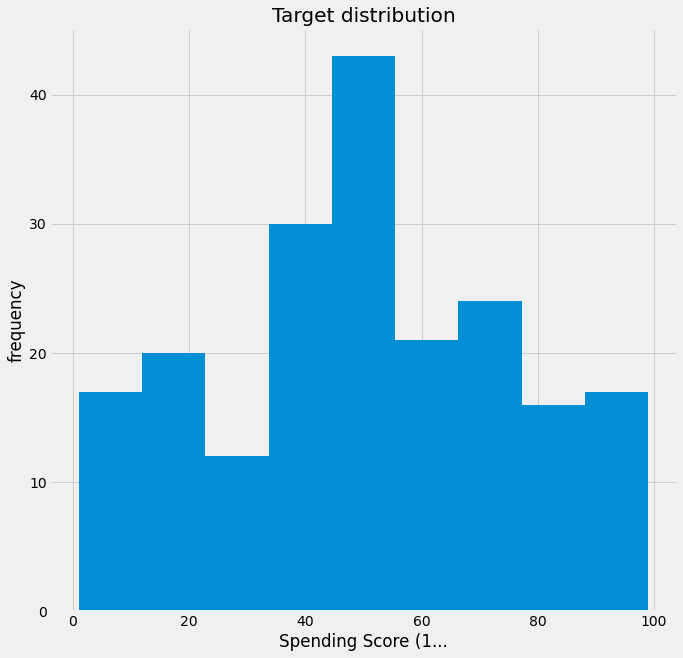

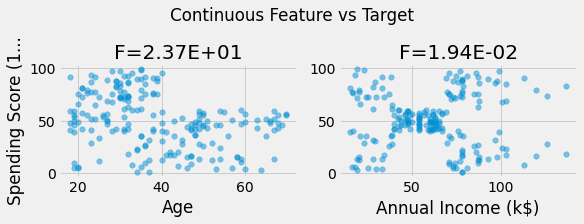

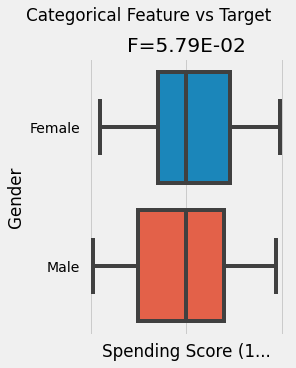

In [30]:
dabl.plot(data, target_col= 'Spending Score (1-100)')

# **Descriptive Statistics**

In [31]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [33]:
data.isnull().any().any()

False

# **Data Visualization**

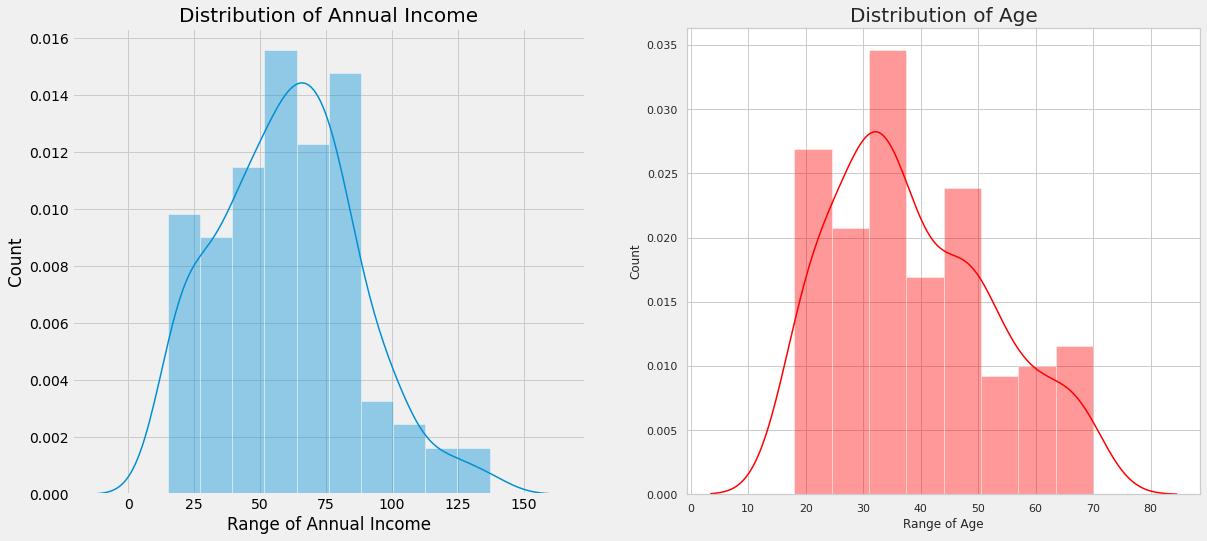

In [34]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= (18,8)
plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style= 'whitegrid')
sns.distplot(data['Age'], color='red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

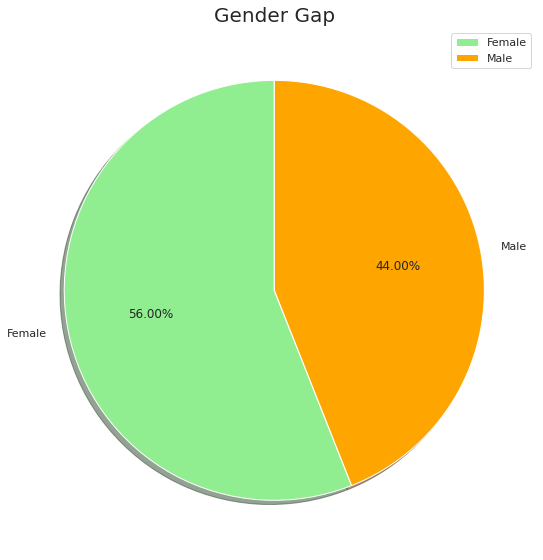

In [35]:
labels = ['Female', 'Male']
size= data['Gender'].value_counts()
colors= ['lightgreen','orange']
explode = [0, 0.001]
plt.rcParams['figure.figsize']=(9,9)
plt.pie(size, colors= colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%') 
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

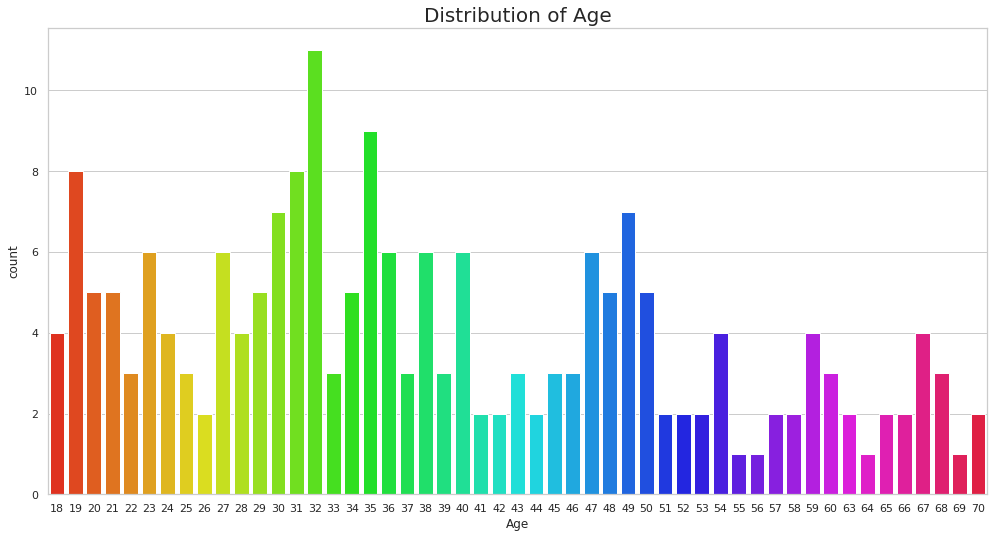

In [36]:
plt.rcParams['figure.figsize']=(15,8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

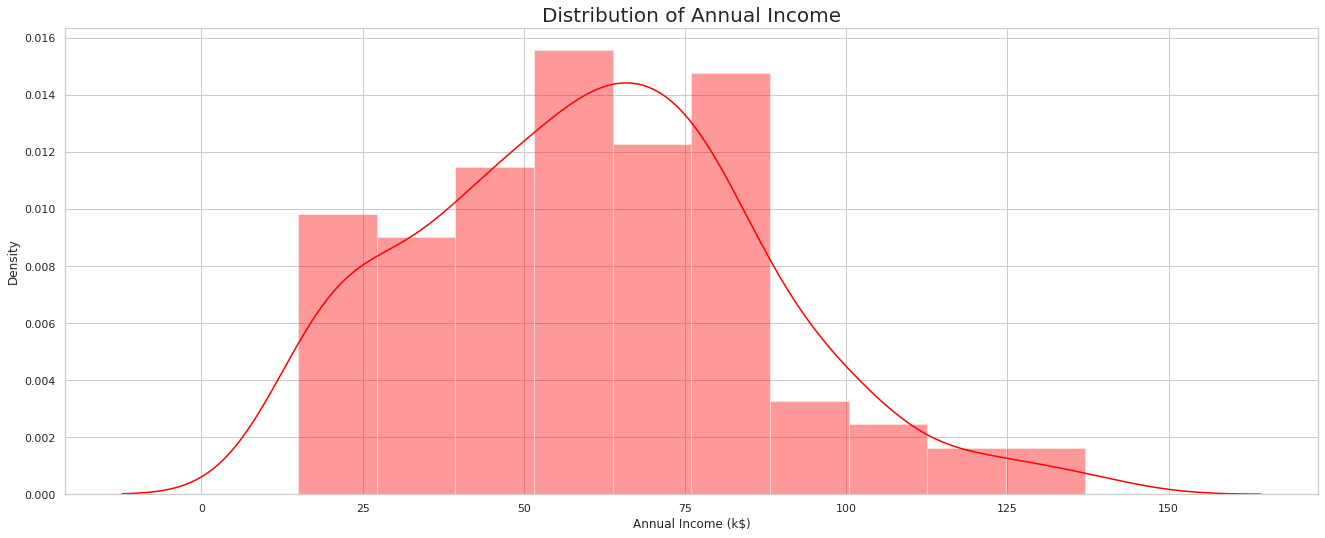

In [37]:
plt.rcParams['figure.figsize'] = (20,8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize= 20)
plt.show()

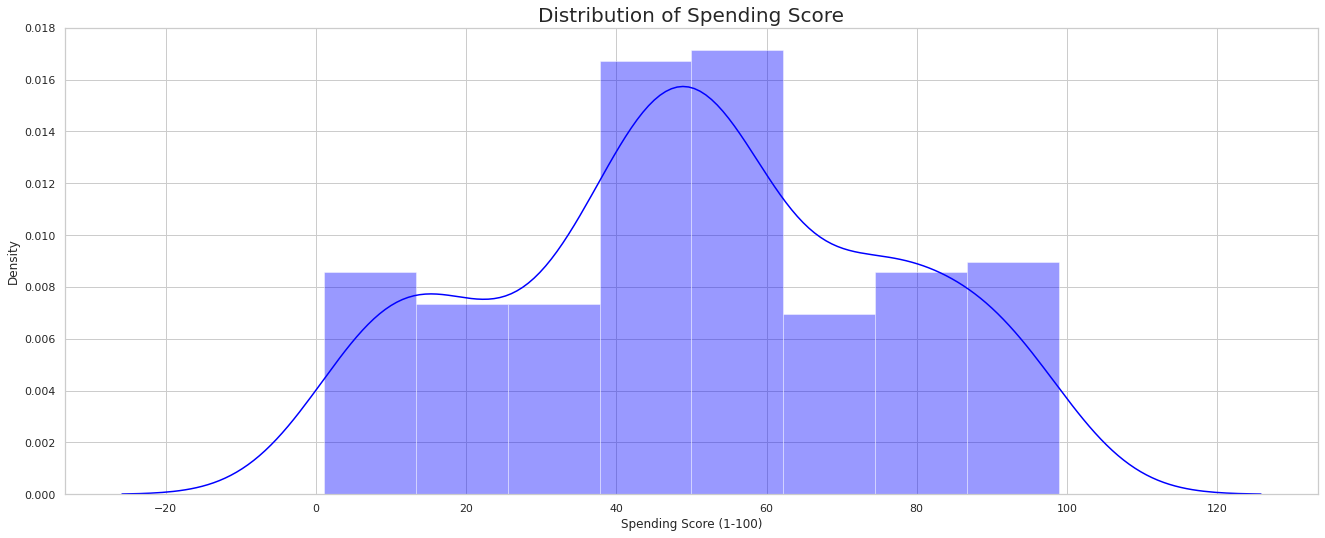

In [38]:
plt.rcParams['figure.figsize'] = (20,8)
sns.distplot(data['Spending Score (1-100)'], color = 'blue')
plt.title('Distribution of Spending Score', fontsize= 20)
plt.show()

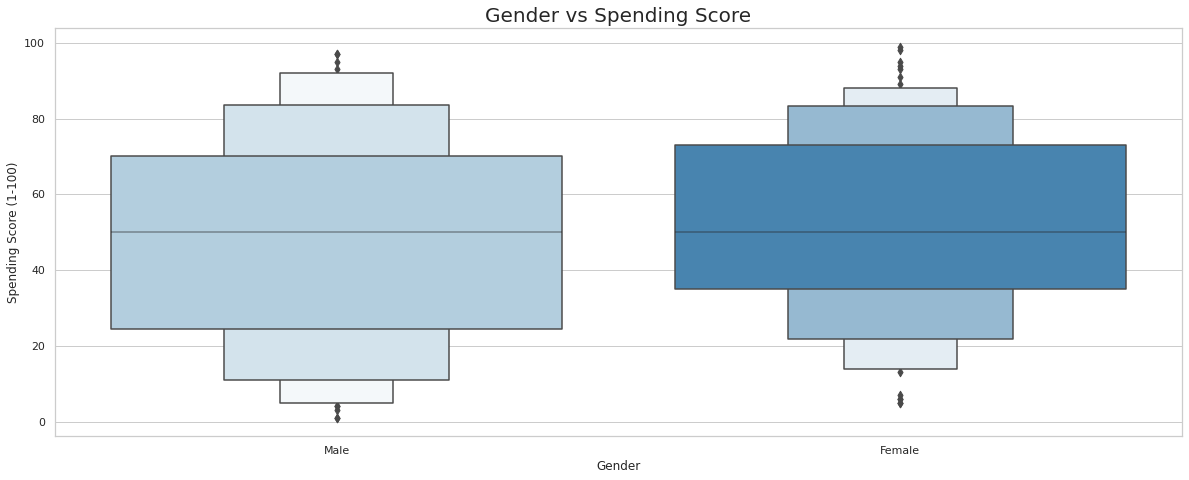

In [39]:
plt.rcParams['figure.figsize'] = (18,7)
sns.boxenplot(data['Gender'],data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize= 20)
plt.show()

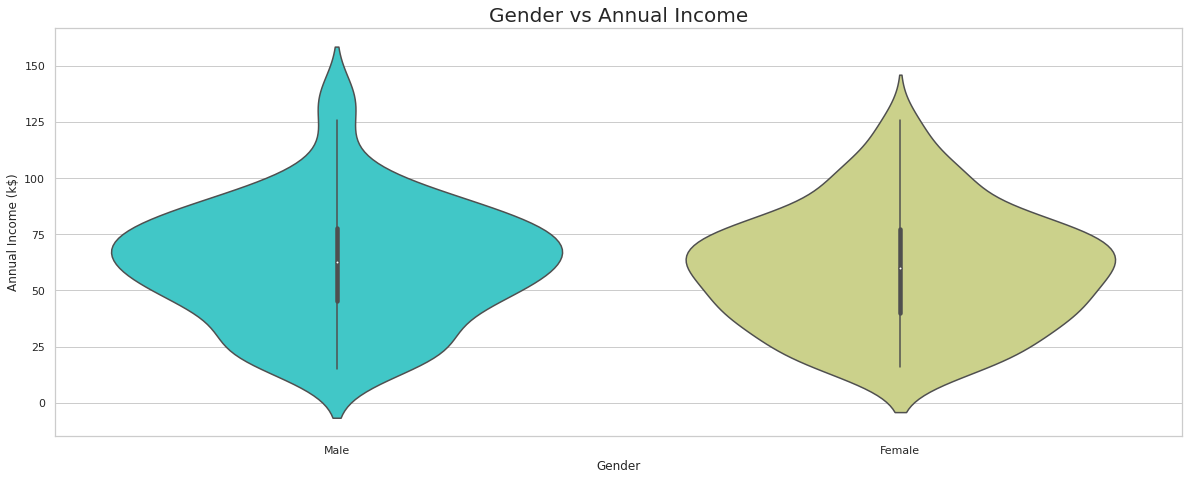

In [40]:
plt.rcParams['figure.figsize'] = (18,7)
sns.violinplot(data['Gender'],data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize= 20)
plt.show()

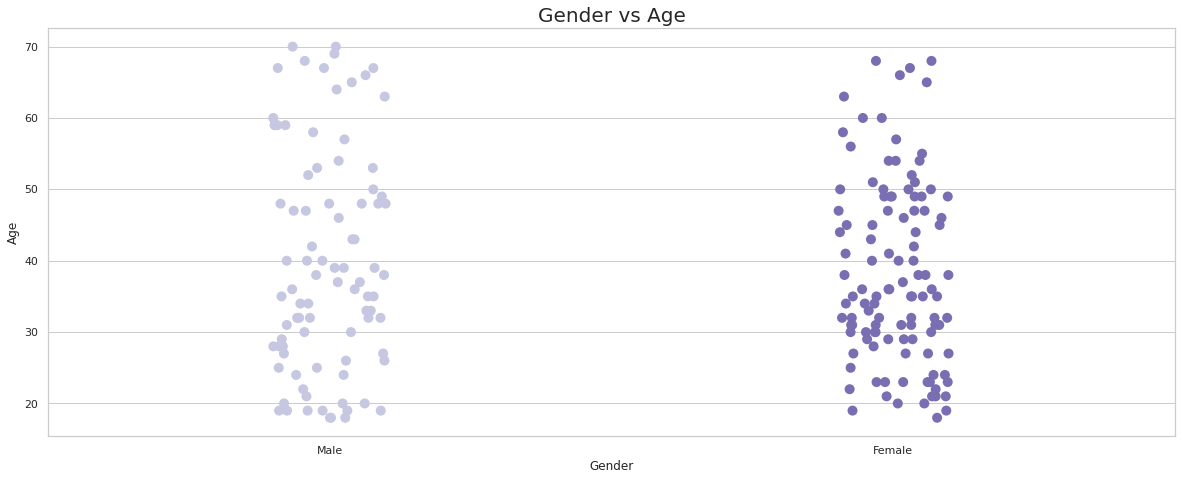

In [41]:
plt.rcParams['figure.figsize'] = (18,7)
sns.stripplot(data['Gender'],data['Age'], palette = 'Purples', size= 10)
plt.title('Gender vs Age', fontsize= 20)
plt.show()

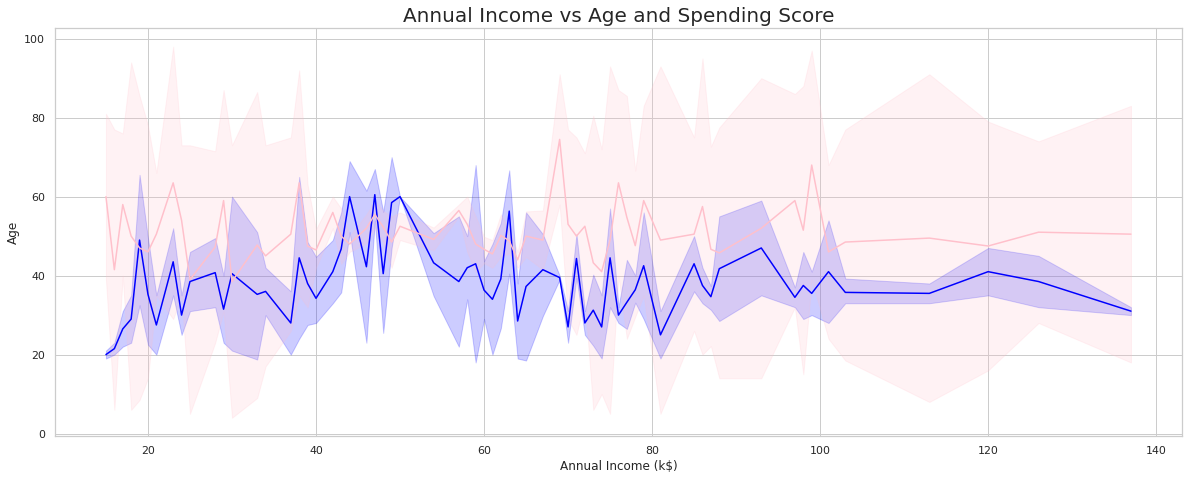

In [42]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']
sns.lineplot(x,y, color = 'blue')
sns.lineplot(x,z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize= 20)
plt.show()

# **Clustering Analysis**

In [43]:
import warnings
warnings.filterwarnings('ignore')
x = data.loc[:,['Spending Score (1-100)','Annual Income (k$)']].values
print(x.shape)

(200, 2)


In [44]:
x_data = pd.DataFrame(x)
x_data.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


# **K Means Algorithm**

**The Elbow Method to find the no. of Optimal Clusters**

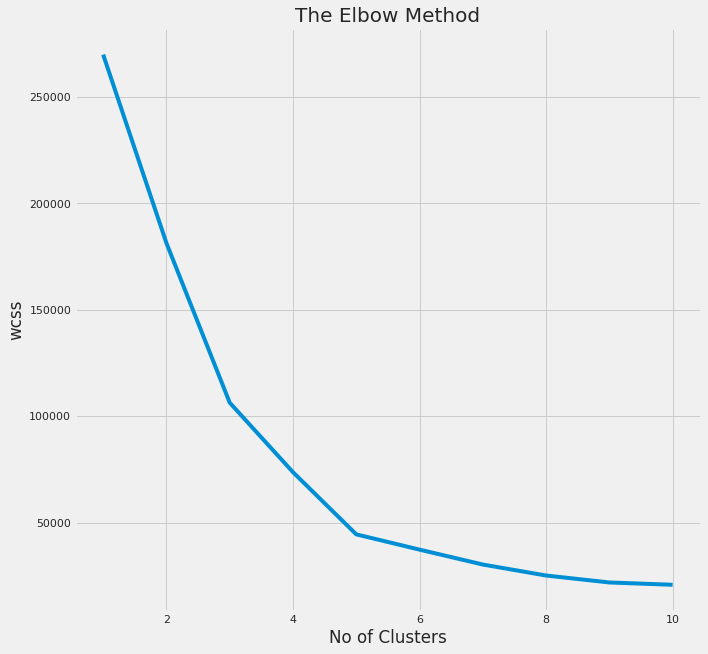

In [57]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  km = KMeans (n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
  km.fit(x)
  wcss.append(km.inertia_)


plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize= 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

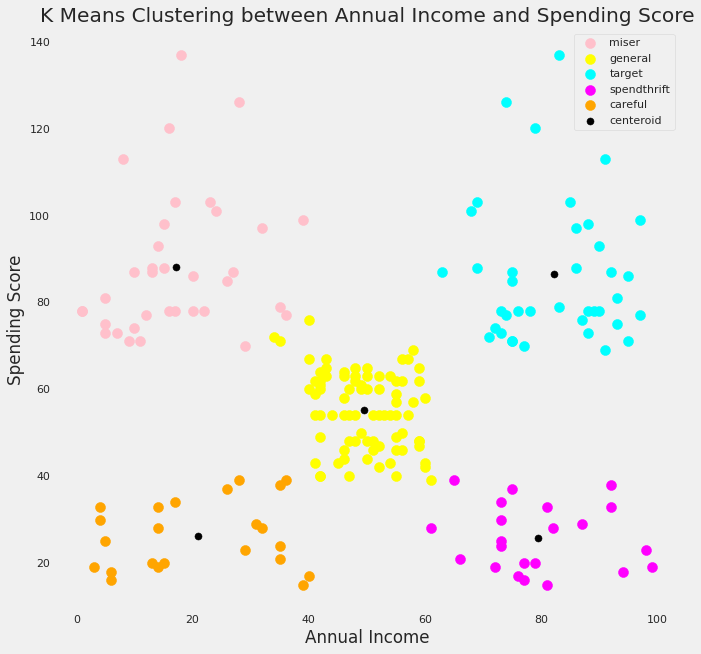

In [61]:
plt.style.use('fivethirtyeight')

km = KMeans (n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s= 50, c= 'black', label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

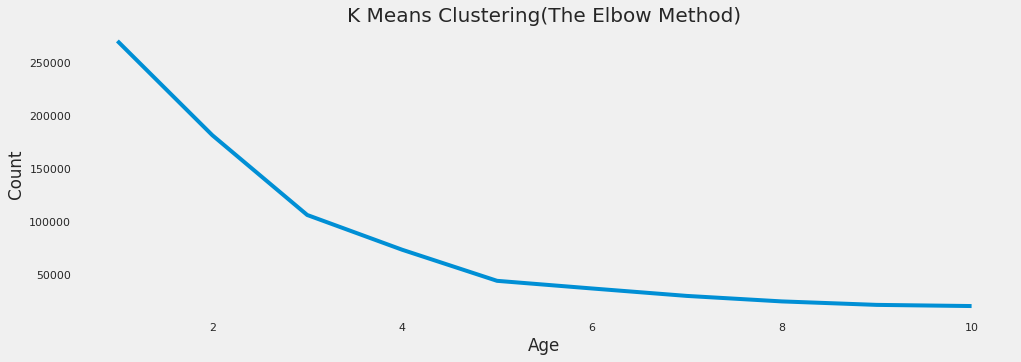

In [59]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans (n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15,5)
plt.plot(range(1,11), wcss)
plt.title('K Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()


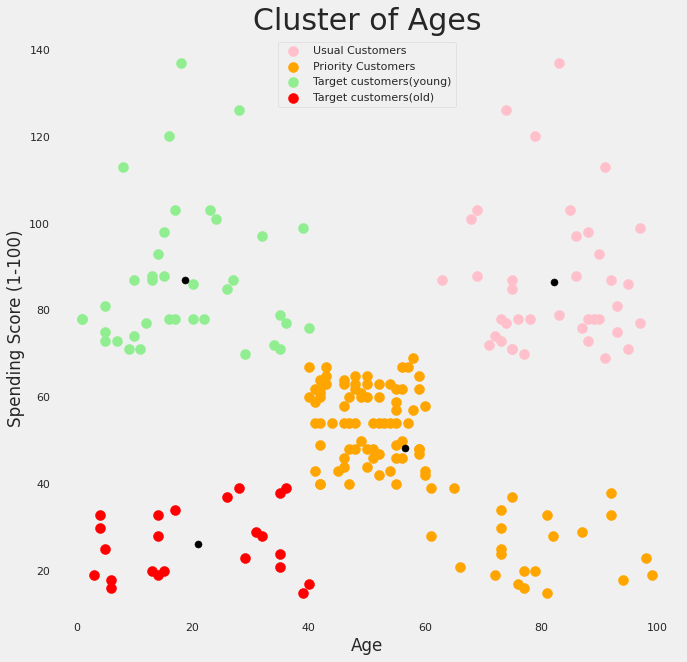

In [60]:
 kmeans = KMeans (n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
 ymeans = kmeans.fit_predict(x)

 plt.rcParams['figure.figsize'] = (10,10)
 plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target customers(young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target customers(old)')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 50, c= 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()